# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [113]:
# Tampilkan 5 baris pertama dengan function head.
# Load Dataset
url= "https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m"
df = pd.read_csv(url)  
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.00,Doctor,81.00,1.00,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.00,Doctor,141.00,1.00,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.00,Student,56.00,1.00,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.00,Student,25.00,1.00,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.00,1.00,7429.40,2024-11-04 08:06:39


In [114]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

*Insight Data df.info( :*)
- Dataset terdiri dari 2.537 baris dan 16 kolom, ukuran data yang cukup besar untuk analisis dan pemodelan.
- Terdapat 5 kolom bertipe numerik (float64) yang mencakup fitur penting seperti TransactionAmount, CustomerAge, TransactionDuration, LoginAttempts, dan AccountBalance.
- Sebagian besar kolom (11 kolom) bertipe objek (object), yang kemungkinan berisi data kategorikal seperti TransactionType, Location, DeviceID, dan tanggal berupa string (TransactionDate, PreviousTransactionDate).

In [115]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.00,2519.00,2511.00,2516.00,2510.00
mean,297.66,44.68,119.42,1.12,5113.44
std,292.23,17.84,70.08,0.59,3897.98
min,0.26,18.00,10.00,1.00,101.25
25%,81.31,27.00,63.00,1.00,1504.73
50%,211.36,45.00,112.00,1.00,4734.11
75%,413.11,59.00,161.00,1.00,7672.69
max,1919.11,80.00,300.00,5.00,14977.99


**Insight** : Dataset Transaksi Keuangan
*Tipe Data, Nilai Kosong, dan Struktur Dataset*
- Dataset memiliki 2.537 baris dan 16 kolom.
- Terdiri dari 11 kolom bertipe object (teks/waktu) dan 5 kolom float64 (numerik).
- Terdapat missing value pada hampir semua kolom, namun jumlahnya relatif kecil (< 2% per kolom) 

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

*Pada tahap Exploratory Data Analysis (EDA) untuk memahami karakteristik dataset. EDA bertujuan untuk :*
- Memahami Struktur Data
    - Meninjau jumlah baris dan kolom pada dataset untuk mengetahui ukuran data.  
    - Melihat tipe data setiap kolom, apakah numerik atau kategorikal.

- Menangani Data yang Hilang
    - Mengidentifikasi jumlah missing values pada tiap kolom.  
    - Menentukan apakah diperlukan langkah penanganan missing values, seperti imputasi atau penghapusan data.

- Visualisasi Awal
    - Menyiapkan visualisasi distribusi data numerik agar bisa mengenali pola sebaran, outlier, dan karakteristik lainnya.

In [116]:
# (Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

# 1. Menampilkan jumlah baris dan kolom
print("Jumlah baris dan kolom:", df.shape)

# 2. Menampilkan tipe data dan jumlah missing value per kolom
print("Informasi data:")
print(df.info())
print("\nJumlah missing value per kolom:")
print(df.isnull().sum())

# 3. Statistik deskriptif untuk kolom numerik
print("\nStatistik deskriptif fitur numerik:")
print(df.describe())

# 4. Visualisasi distribusi kolom numerik
import matplotlib.pyplot as plt
import seaborn as sns

numerik_df = df.select_dtypes(include=['int64', 'float64']).fillna(df.mean(numeric_only=True))



Jumlah baris dan kolom: (2537, 16)
Informasi data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            25

*Insight dari Exploratory Data Analysis Awal*
1. Struktur Data :
- Dataset terdiri dari 2.537 baris dan 16 kolom. Tipe data mencakup kombinasi antara:
    - Numerik: 5 kolom (tipe float64) seperti TransactionAmount, CustomerAge, AccountBalance.
    - Kategorikal/Teks: 11 kolom (tipe object) seperti TransactionID, TransactionType, Location, dll.

2. Kualitas Data (Missing Values)
- Terdapat missing values di hampir semua kolom, terutama:
    - TransactionID (29 nilai hilang)
    - TransactionType, Location, DeviceID (masing-masing 30 nilai hilang)
    - CustomerOccupation (23 nilai hilang)
    - PreviousTransactionDate (24 nilai hilang) Ini menunjukkan bahwa proses pembersihan data (seperti imputasi atau penghapusan baris/kolom tertentu) perlu dilakukan sebelum membangun model.

**Tujuan dari analisis korelasi antar fitur:**
- Mengidentifikasi fitur yang memiliki hubungan kuat, yang bisa membantu dalam pemilihan fitur (feature selection).
- Mengetahui kemungkinan terjadinya multikolinearitas (korelasi tinggi antar fitur), yang bisa memengaruhi performa model prediktif tertentu.

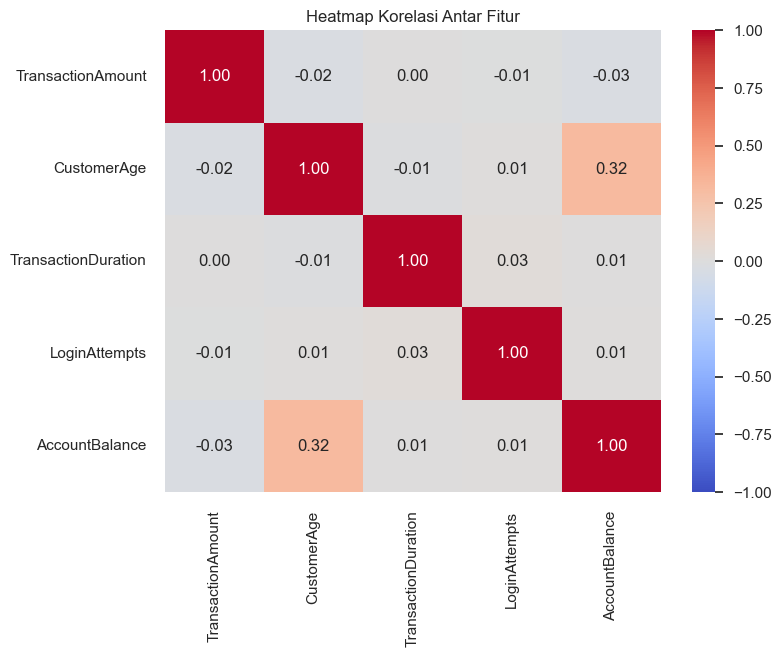

In [117]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

import matplotlib.pyplot as plt
import seaborn as sns

# Hitung korelasi antar fitur numerik (sudah diimputasi sebelumnya)
corr_matrix = numerik_df.corr()

# Tampilkan heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()


*Insight korelasi antar fitur :*
- Tidak ditemukan multikolinearitas ekstrem antar fitur numerik.

**Visualisasi Distribusi Fitur Numerik (Histogram) :**
- Visualisasi histogram digunakan untuk memahami sebaran nilai dari setiap fitur numerik dalam dataset.

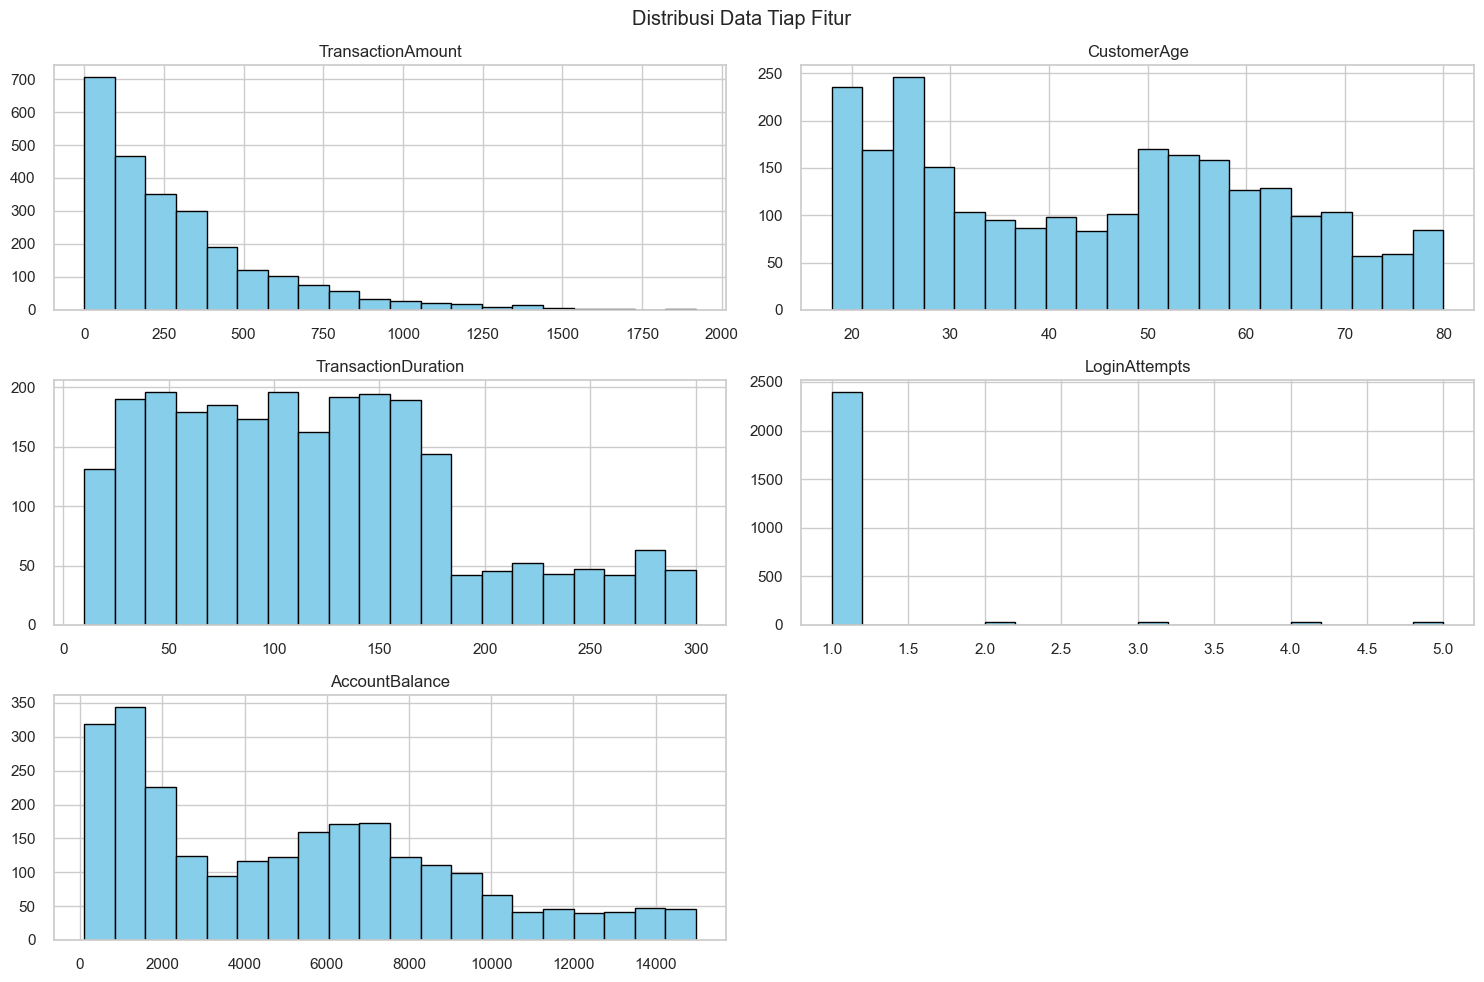

In [118]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

# Menampilkan histogram untuk semua kolom numerik
df.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Data Tiap Fitur")
plt.tight_layout()
plt.show()

*Insight dari Histogram Fitur Numerik :*
- TransactionAmount dan AccountBalance cenderung memiliki distribusi yang skew (miring ke kanan), menunjukkan banyak nilai kecil dan sedikit nilai besar. Ini umum terjadi pada data keuangan, di mana sebagian besar transaksi bernilai kecil sementara hanya sedikit yang bernilai sangat besar.
- TransactionDuration dan LoginAttempts menunjukkan pola distribusi yang tidak normal dan agak tersebar, menandakan variabilitas tinggi antar entri transaksi.
- CustomerAge menunjukkan distribusi yang relatif normal, namun bisa jadi terdapat puncak tertentu yang menandakan kelompok umur dominan pada pelanggan.

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

*Visualisasi lanjutan (Advanced EDA) agar mendapatkan pemahaman yang lebih dalam terhadap fitur numerik pada dataset.*

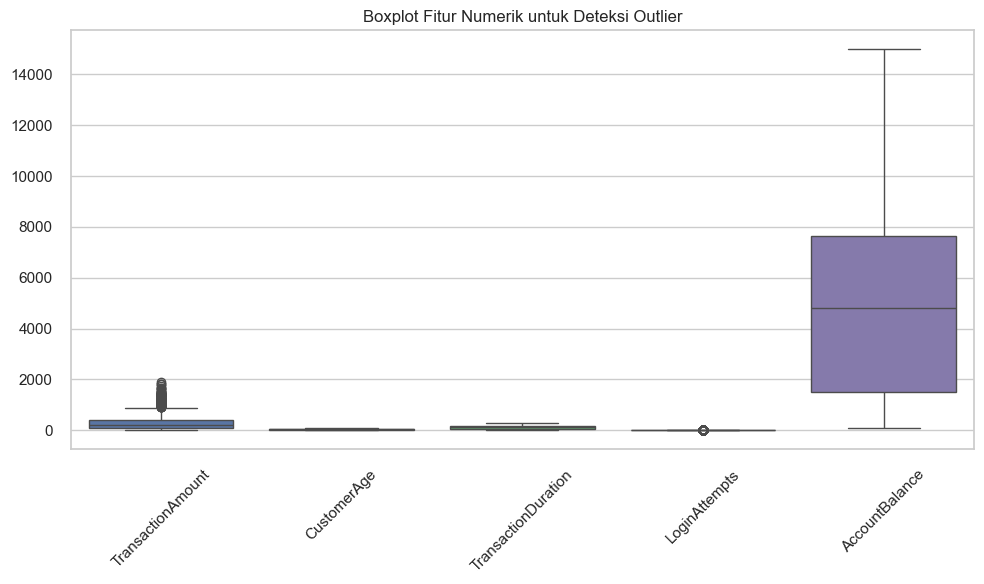

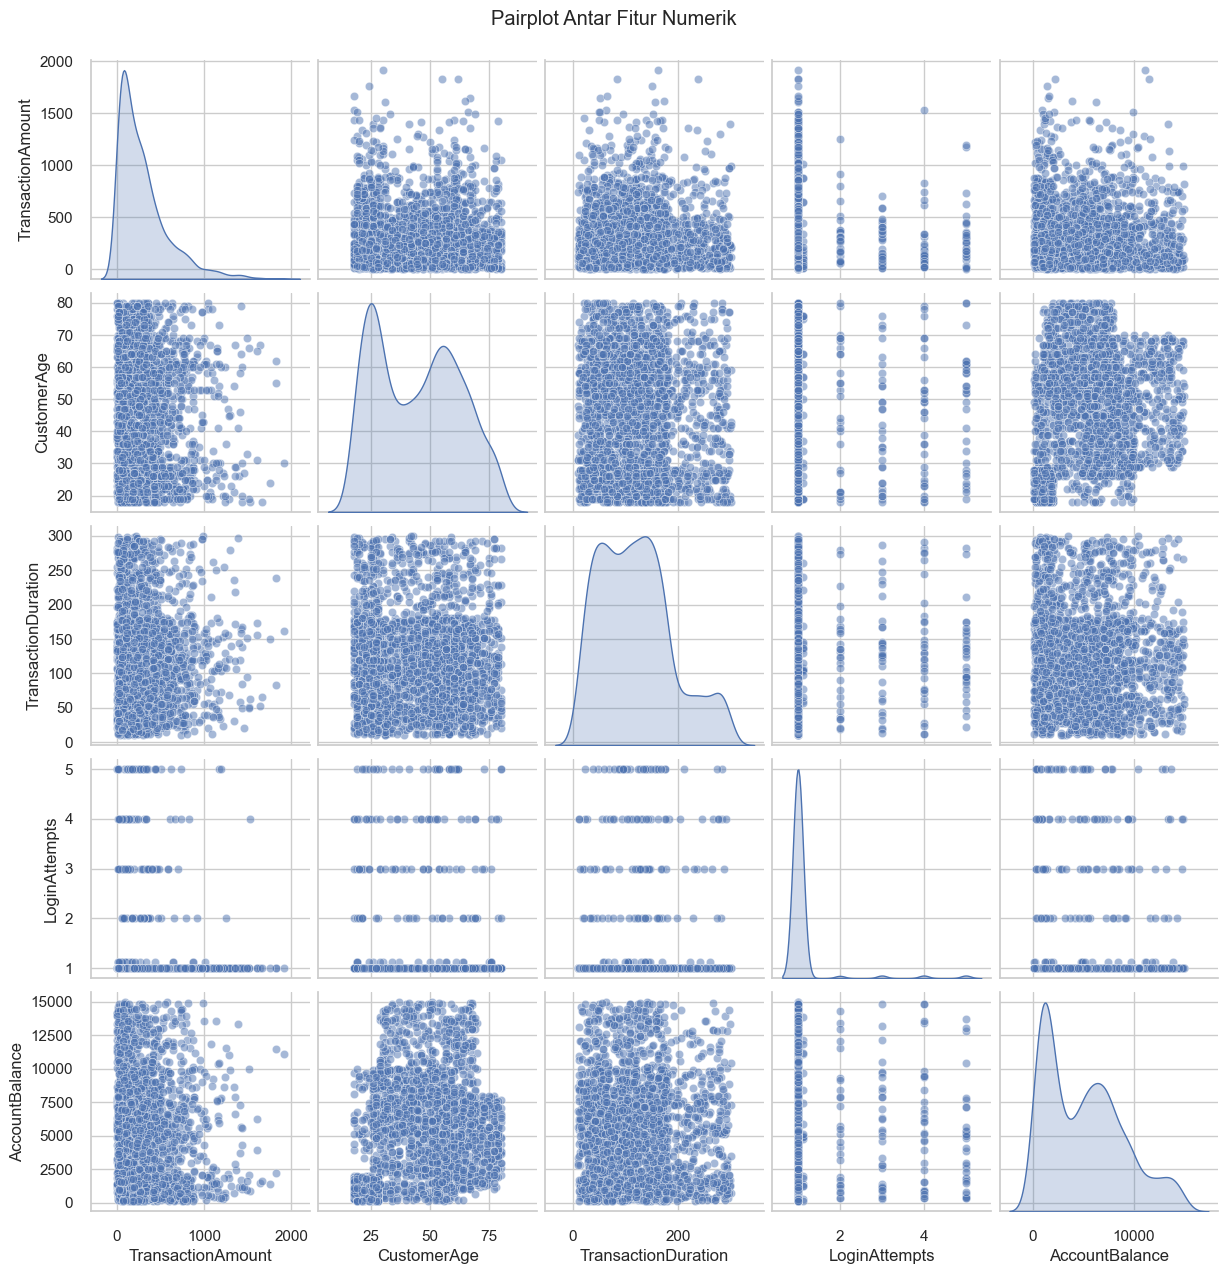

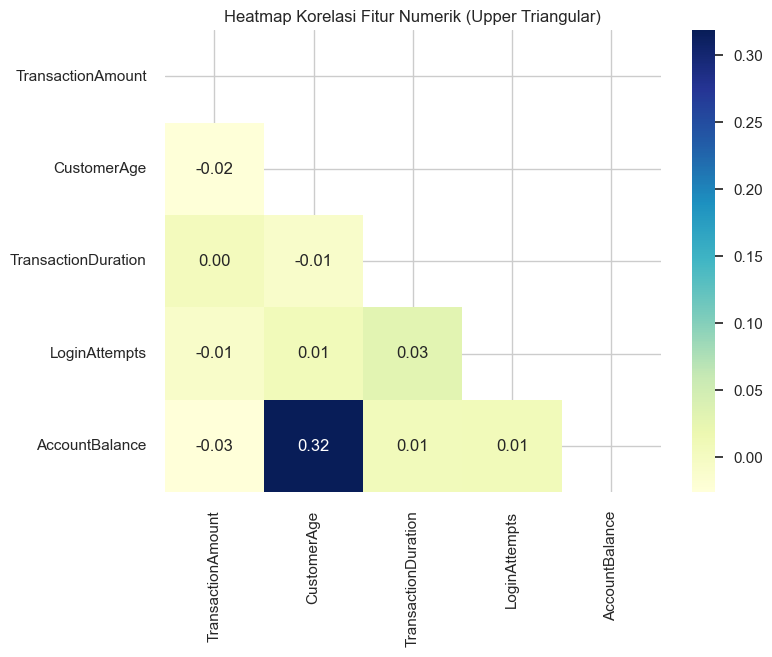

In [119]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Boxplot untuk deteksi outlier ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=numerik_df)
plt.title('Boxplot Fitur Numerik untuk Deteksi Outlier')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 2. Pairplot untuk melihat hubungan antar fitur ---
sns.pairplot(numerik_df, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot Antar Fitur Numerik", y=1.02)
plt.show()

# --- 3. Korelasi heatmap dengan masking (upper triangle) ---
plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(numerik_df.corr(), dtype=bool))
sns.heatmap(numerik_df.corr(), annot=True, cmap="YlGnBu", fmt=".2f", mask=mask)
plt.title('Heatmap Korelasi Fitur Numerik (Upper Triangular)')
plt.show()


*- Visualisasi lanjutan ini memberikan pandangan lebih menyeluruh terhadap struktur data, pola, dan potensi masalah (seperti outlier dan korelasi tinggi). Ini penting sebagai bagian dari pra-pemodelan agar model yang dibangun nantinya memiliki performa yang optimal dan lebih robust.*

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [120]:
# Mengecek dataset menggunakan isnull().sum()
# Mengecek jumlah missing value per kolom
print("Jumlah missing value per kolom:")
print(df.isnull().sum())

Jumlah missing value per kolom:
TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


*Insight :*
- Tingkat Kehilangan Data 
    - Kolom dengan jumlah missing tertinggi adalah TransactionType, Location, dan DeviceID masing-masing dengan 30 data hilang.
    - Kolom lainnya memiliki missing value berkisar antara 18–29 data.
- Persentase Kehilangan
    - Semua kolom yang memiliki missing value berada dalam rentang <2% dari total data (maksimum 30/2537 ≈ 1.18%).

In [121]:
# Mengecek dataset menggunakan duplicated().sum()
print("\nJumlah data duplikat:")
print(df.duplicated().sum())


Jumlah data duplikat:
21


*Insight :* 
- Terdapat 21 data duplikat 

**Menanggani Duplikat Data**

In [123]:
# Menghapus data duplikat
df = df.drop_duplicates()
print("Jumlah data setelah menghapus duplikat:", df.shape)

Jumlah data setelah menghapus duplikat: (2516, 16)


**Menanggani Missing Value**

In [124]:
# Pisahkan kolom numerik dan kategorikal
numerik_cols = df.select_dtypes(include=['int64', 'float64']).columns
kategorikal_cols = df.select_dtypes(include=['object']).columns

# Imputasi missing value pada kolom numerik dengan mean
df[numerik_cols] = df[numerik_cols].fillna(df[numerik_cols].mean())

# Imputasi missing value pada kolom kategorikal dengan modus
for col in kategorikal_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Cek kembali missing value setelah imputasi
print("\nJumlah missing value per kolom setelah imputasi:")
print(df.isnull().sum())



Jumlah missing value per kolom setelah imputasi:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


*Insight :*
- Data duplikat telah berhasil ditangani

**- Lakukan normalisasi fitur numerik menggunakan MinMaxScaler agar semua nilai berada dalam rentang 0 hingga 1, sehingga model dapat belajar dengan lebih optimal.**

In [125]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

from sklearn.preprocessing import MinMaxScaler

# Pilih kolom numerik
numerik_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Inisialisasi scaler
scaler = MinMaxScaler()
df[numerik_cols] = scaler.fit_transform(df[numerik_cols])

# Lakukan scaling pada kolom numerik
df[numerik_cols] = scaler.fit_transform(df[numerik_cols])

# Tampilkan 5 baris pertama hasil scaling
print(df[numerik_cols].head())


   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0               0.01         0.84                 0.24           0.00   
1               0.20         0.81                 0.45           0.00   
2               0.07         0.02                 0.16           0.00   
3               0.10         0.13                 0.05           0.00   
4               0.01         0.43                 0.65           0.00   

   AccountBalance  
0            0.34  
1            0.92  
2            0.07  
3            0.57  
4            0.49  


**insight dari hasil scaling MinMax :**
1. Semua nilai fitur numerik sudah diskalakan ke rentang 0 sampai 1.
    - Ini memudahkan algoritma machine learning agar fitur-fitur tersebut sebanding dalam skala yang sama.

2. Distribusi nilai yang sudah diskalakan:
    - Nilai yang kecil seperti 0.006-0.007 untuk TransactionAmount mengindikasikan transaksi yang kecil dibanding keseluruhan.
    - Nilai besar seperti 0.9 pada AccountBalance mengindikasikan saldo akun yang tinggi.



In [126]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df.drop(columns=[
    'TransactionID',
    'AccountID',
    'DeviceID',
    'MerchantID',
    'IP Address'
], inplace=True)


*Langkah-langkah Encoding Fitur Kategorikal :*
- Memilih semua kolom bertipe kategorikal (object).
- Mengonversi setiap nilai kategorikal menjadi string (untuk mencegah error).
- Menerapkan LabelEncoder secara iteratif ke setiap kolom.

In [127]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melakukan encoding.

from sklearn.preprocessing import LabelEncoder

# Pilih kolom kategorikal (tipe object)
kategorikal_cols = df.select_dtypes(include=['object']).columns

# Inisialisasi encoder
le = LabelEncoder()

# Loop encoding setiap kolom kategorikal
for col in kategorikal_cols:
    df[col] = le.fit_transform(df[col].astype(str))  # pastikan tipe string agar tidak error

# Tampilkan 5 baris pertama setelah encoding
print(df.head())


   TransactionAmount  TransactionDate  TransactionType  Location  Channel  \
0               0.01              680                1        36        0   
1               0.20             1178                1        15        0   
2               0.07             1262                1        23        2   
3               0.10              818                1        33        2   
4               0.01             1939                0         1        2   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0         0.84                   0                 0.24           0.00   
1         0.81                   0                 0.45           0.00   
2         0.02                   3                 0.16           0.00   
3         0.13                   3                 0.05           0.00   
4         0.43                   3                 0.65           0.00   

   AccountBalance  PreviousTransactionDate  
0            0.34                      105  
1 

*Insight Hasil Transformasi Data :*
1. Fitur Numerik Sudah Dinormalisasi
    - Nilai pada kolom seperti TransactionAmount, CustomerAge, TransactionDuration, LoginAttempts, dan AccountBalance telah berada dalam rentang 0 hingga 1, hasil dari MinMaxScaler.

2. Fitur Kategorikal Telah Dikonversi ke Bentuk Numerik
    - Kolom seperti TransactionType, Location, Channel, CustomerOccupation, dan PreviousTransactionDate telah diencoding menggunakan LabelEncoder, sehingga model dapat memproses data non-numerik dalam bentuk angka.

In [128]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()

df.columns.tolist()


['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

In [129]:
print(df.columns.tolist())


['TransactionAmount', 'TransactionDate', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate']


*Insight :*
- Beberapa data ID telah berhasil dihapus, sehingga output yang keluar seperti diatas.

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Imputasi Missing Value**

In [130]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

# Numerik: imputasi mean
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Kategorikal: imputasi modus
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values setelah imputasi:")
print(df.isnull().sum())


Missing values setelah imputasi:
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


*Insight :*
- Seluruh Missing Values Telah Dihilangkan

**Menangani Data Duplikak**

In [131]:
# Menghapus data duplikat menggunakan drop_duplicates().

# Hapus data duplikat jika ada
df = df.drop_duplicates()
print("\nData setelah hapus duplikat:", df.shape)



Data setelah hapus duplikat: (2515, 11)


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

**Langkah-langkah yang dilakukan :**
- Menghitung batas bawah dan atas (lower & upper bound) berdasarkan IQR untuk setiap kolom numerik.
- Jika nilai outlier pada kolom yang kurang dari 20, maka baris dengan nilai outlier tersebut akan dihapus (drop).
- Jika jumlah outlier pada kolom lebih dari atau sama dengan 20, maka dilakukan capping (winsorizing), yaitu mengganti nilai ekstrem dengan batas bawah atau atas IQR.


In [132]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

import pandas as pd
import numpy as np

# Copy data numerik biar aman
df_outlier = numerik_df.copy()

# Fungsi hitung outlier per kolom berdasarkan IQR
def detect_outliers_iqr(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (col < lower_bound) | (col > upper_bound), lower_bound, upper_bound

# Threshold jumlah outlier untuk memutuskan drop atau capping
threshold = 20

# Simpan index baris yang outlier untuk drop
rows_to_drop = set()

# Loop tiap kolom numerik
for col in df_outlier.columns:
    outlier_mask, lower, upper = detect_outliers_iqr(df_outlier[col])
    n_outliers = outlier_mask.sum()
    print(f"Kolom '{col}' punya {n_outliers} outlier.")
    
    if n_outliers == 0:
        continue  # tidak ada outlier, lanjut
    
    if n_outliers < threshold:
        # Kalo sedikit, kumpulkan index baris outlier untuk nanti di-drop
        outlier_indices = df_outlier.index[outlier_mask].tolist()
        rows_to_drop.update(outlier_indices)
        print(f"  Drop {n_outliers} baris outlier di kolom '{col}'")
    else:
        # Kalo banyak, lakukan capping (winsorizing)
        print(f"  Lakukan capping outlier di kolom '{col}'")
        df_outlier.loc[df_outlier[col] < lower, col] = lower
        df_outlier.loc[df_outlier[col] > upper, col] = upper

# Drop semua baris outlier yang sudah terkumpul
print(f"\nTotal baris yang akan di-drop karena outlier: {len(rows_to_drop)}")
df_outlier_cleaned = df_outlier.drop(index=rows_to_drop).reset_index(drop=True)

print(f"\nJumlah data sebelum pembersihan outlier: {numerik_df.shape}")
print(f"Jumlah data setelah pembersihan outlier: {df_outlier_cleaned.shape}")

# Update numerik_df dengan data bersih outlier
numerik_df = df_outlier_cleaned


Kolom 'TransactionAmount' punya 114 outlier.
  Lakukan capping outlier di kolom 'TransactionAmount'
Kolom 'CustomerAge' punya 0 outlier.
Kolom 'TransactionDuration' punya 0 outlier.
Kolom 'LoginAttempts' punya 141 outlier.
  Lakukan capping outlier di kolom 'LoginAttempts'
Kolom 'AccountBalance' punya 0 outlier.

Total baris yang akan di-drop karena outlier: 0

Jumlah data sebelum pembersihan outlier: (2537, 5)
Jumlah data setelah pembersihan outlier: (2537, 5)


*Insight :*
- Berdasarkan deteksi menggunakan metode IQR, tidak ditemukan outlier pada seluruh kolom numerik yang dianalisis.
- Karena tidak ada nilai ekstrem yang perlu ditangani, tidak dilakukan proses drop maupun capping.
- Dataset numerik sudah bersih dari outlier, sehingga dapat langsung digunakan untuk pemodelan atau analisis lanjutan tanpa risiko bias dari data ekstrem.

**Langkah selanjutnya meLakukan binning (pengelompokan nilai) pada fitur numerik TransactionAmount dan CustomerAge ke dalam beberapa kategori, lalu gunakan LabelEncoder untuk mengubah kategori tersebut menjadi nilai numerik.**

In [133]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Binning pada kolom 'TransactionAmount' (nilai sudah antara 0 dan 1)
bins_amount = [-0.01, 0.1, 0.3, 0.6, 1.01]  # rentang bins harus monotonik naik
labels_amount = ['Very Low', 'Low', 'Medium', 'High']
df['TransactionAmount_binned'] = pd.cut(df['TransactionAmount'], bins=bins_amount, labels=labels_amount)

# Binning pada kolom 'CustomerAge' (nilai sudah antara 0 dan 1)
bins_age = [-0.01, 0.2, 0.4, 0.6, 1.01]
labels_age = ['Young', 'Adult', 'Middle Age', 'Senior']
df['CustomerAge_binned'] = pd.cut(df['CustomerAge'], bins=bins_age, labels=labels_age)

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Encode hasil binning
df['TransactionAmount_binned_encoded'] = le.fit_transform(df['TransactionAmount_binned'].astype(str))
df['CustomerAge_binned_encoded'] = le.fit_transform(df['CustomerAge_binned'].astype(str))

# Tampilkan hasil binning dan encoding
print(df[['TransactionAmount', 'TransactionAmount_binned', 'TransactionAmount_binned_encoded']].head())
print(df[['CustomerAge', 'CustomerAge_binned', 'CustomerAge_binned_encoded']].head())


   TransactionAmount TransactionAmount_binned  \
0               0.01                 Very Low   
1               0.20                      Low   
2               0.07                 Very Low   
3               0.10                 Very Low   
4               0.01                 Very Low   

   TransactionAmount_binned_encoded  
0                                 3  
1                                 1  
2                                 3  
3                                 3  
4                                 3  
   CustomerAge CustomerAge_binned  CustomerAge_binned_encoded
0         0.84             Senior                           2
1         0.81             Senior                           2
2         0.02              Young                           3
3         0.13              Young                           3
4         0.43         Middle Age                           1


*Insight :*
- Nilai TransactionAmount berhasil diklasifikasikan ke dalam kategori: Very Low, Low, Medium, dan High. Mayoritas data awal masuk kategori Very Low, yang menunjukkan banyak transaksi bernilai kecil.
- Nilai CustomerAge dibagi menjadi Young, Adult, Middle Age, dan Senior, di mana data menunjukkan sebagian besar pengguna termasuk kategori Senior dan Young, mengindikasikan rentang usia pengguna cukup tersebar luas.

**Langkah selanjutnya visualisasikan distribusi kategori dari hasil binning TransactionAmount dan CustomerAge menggunakan countplot dari Seaborn untuk memahami persebaran data pada masing-masing kategori.**

C:\Users\ADVAN\AppData\Local\Temp\ipykernel_20752\2102107014.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TransactionAmount_binned', data=df, palette='pastel',
C:\Users\ADVAN\AppData\Local\Temp\ipykernel_20752\2102107014.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CustomerAge_binned', data=df, palette='pastel',


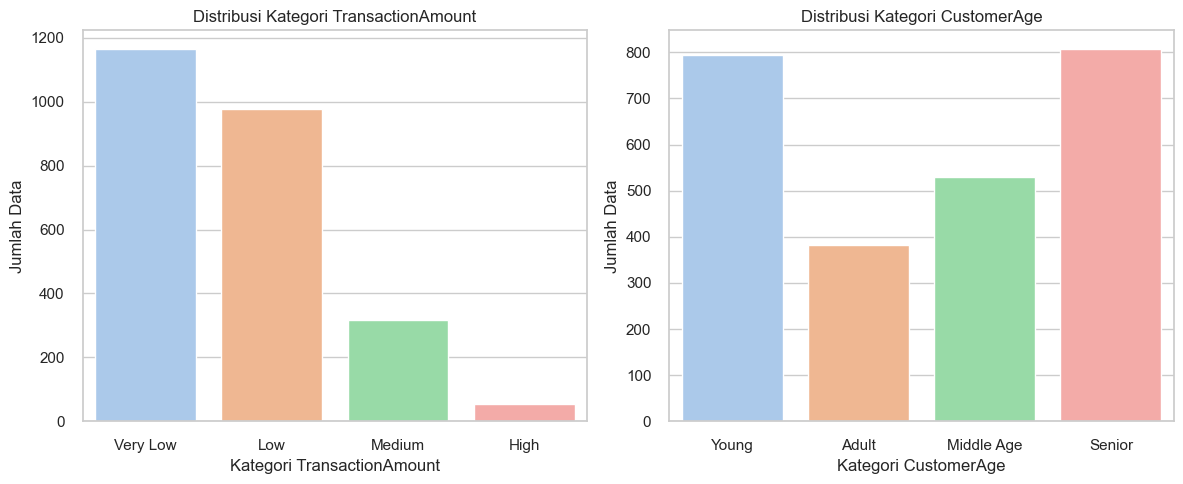

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atur style seaborn
sns.set(style="whitegrid")

# Plot distribusi TransactionAmount_binned
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(x='TransactionAmount_binned', data=df, palette='pastel',
              order=['Very Low', 'Low', 'Medium', 'High'])
plt.title('Distribusi Kategori TransactionAmount')
plt.xlabel('Kategori TransactionAmount')
plt.ylabel('Jumlah Data')

# Plot distribusi CustomerAge_binned
plt.subplot(1,2,2)
sns.countplot(x='CustomerAge_binned', data=df, palette='pastel',
              order=['Young', 'Adult', 'Middle Age', 'Senior'])
plt.title('Distribusi Kategori CustomerAge')
plt.xlabel('Kategori CustomerAge')
plt.ylabel('Jumlah Data')

plt.tight_layout()
plt.show()


**Insight dari Binning dan Distribusi Kategori :**
- Kategori TransactionAmount didominasi oleh Very Low, menunjukkan sebagian besar transaksi memiliki nilai sangat kecil. Kategori High paling jarang muncul, menandakan transaksi bernilai besar jarang terjadi.
- Kategori CustomerAge terbagi cukup merata, namun terlihat Young dan Senior memiliki frekuensi lebih tinggi, menandakan mayoritas pengguna berada pada rentang usia muda dan tua.


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [135]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()

df.describe()


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_binned_encoded,CustomerAge_binned_encoded
count,2515.00,2515.00,2515.00,2515.00,2515.00,2515.00,2515.00,2515.00,2515.00,2515.00,2515.00,2515.00,2515.00
mean,0.16,1233.84,0.78,20.93,0.99,0.43,1.52,0.38,0.03,0.34,179.07,2.03,1.80
std,0.15,718.12,0.42,12.19,0.80,0.29,1.13,0.24,0.15,0.26,102.46,0.97,1.05
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.04,600.50,1.00,11.00,0.00,0.15,0.50,0.18,0.00,0.10,91.00,1.00,1.00
50%,0.11,1228.00,1.00,21.00,1.00,0.44,2.00,0.36,0.00,0.32,178.00,2.00,2.00
75%,0.21,1856.50,1.00,31.00,2.00,0.66,3.00,0.52,0.00,0.51,269.00,3.00,3.00
max,1.00,2484.00,1.00,42.00,2.00,1.00,3.00,1.00,1.00,1.00,359.00,3.00,3.00


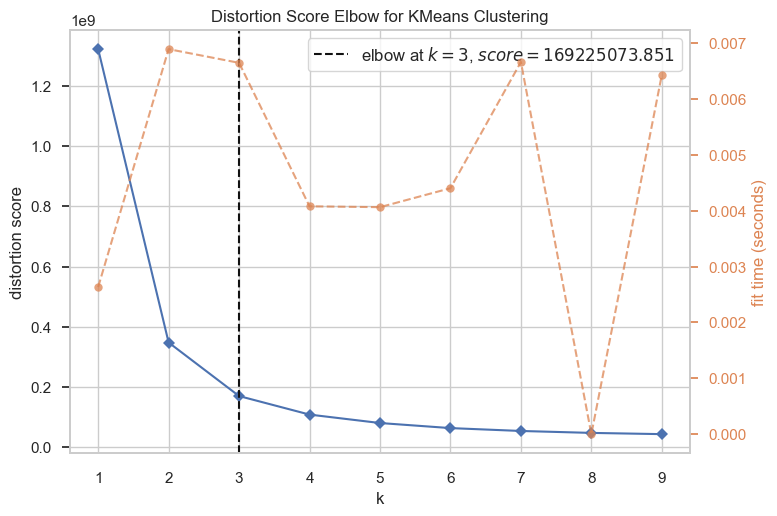

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [136]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

# Inisialisasi model KMeans
model = KMeans(random_state=42)

# Pilih fitur yang akan digunakan untuk clustering
features = df.select_dtypes(include=['float64', 'int64'])

# Visualisasi Elbow Method untuk menentukan jumlah cluster terbaik (misal range 1-10)
visualizer = KElbowVisualizer(model, k=(1,10))

# Fit data ke visualizer
visualizer.fit(features)

# Tampilkan plot
visualizer.show()


*Insight :*
- Jumlah cluster yang optimal untuk dataset ini adalah 3, berdasarkan titik siku (elbow) pada grafik distortion score.

In [137]:
# Menggunakan algoritma K-Means Clustering

from sklearn.cluster import KMeans

# Misalnya hasil dari Elbow Method menunjukkan jumlah cluster optimal adalah 3
n_clusters = 3

# Inisialisasi dan latih model KMeans
model_kmeans = KMeans(n_clusters=n_clusters, random_state=42)
model_kmeans.fit(features)

# Tambahkan hasil cluster ke DataFrame
df['Cluster'] = model_kmeans.labels_

# Tampilkan hasil cluster pertama
print(df[['Cluster']].value_counts())


Cluster
0          856
1          831
2          828
Name: count, dtype: int64


*Insight :*
- Data terbagi cukup merata ke dalam tiga cluster 

Jalankan cell code ini untuk menyimpan model kamu.

In [138]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")


import joblib
joblib.dump(model_kmeans, "model_clustering.h5")


['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [139]:
# Menghitung dan menampilkan nilai Silhouette Score.

from sklearn.metrics import silhouette_score

# Menghitung silhouette score
score = silhouette_score(features, model_kmeans.labels_)

# Tampilkan nilai silhouette score
print(f"Silhouette Score: {score:.4f}")


Silhouette Score: 0.5426


**Insight Tambahan :**
- Model KMeans dengan 3 cluster berhasil membagi data menjadi kelompok yang cukup terpisah dengan silhouette score > 0.5.
- Clustering ini bisa digunakan untuk segmentasi pengguna, perilaku transaksi, atau anomali sederhana berdasarkan kesamaan fitur.

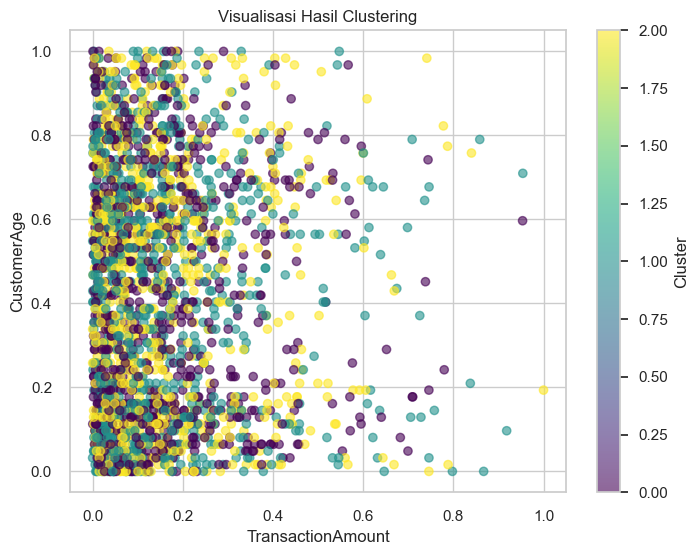

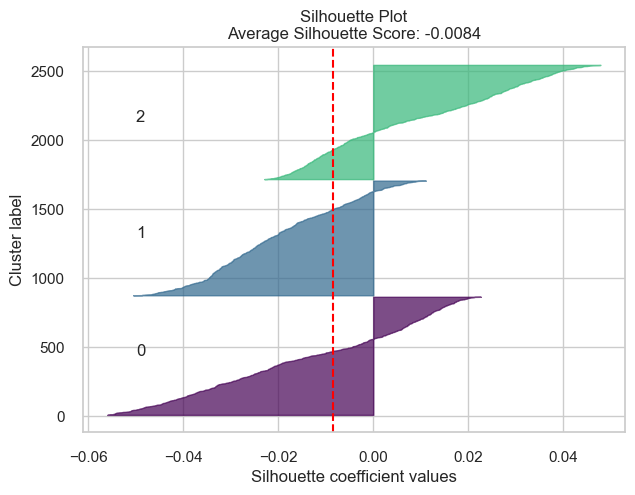

In [140]:
# Membuat visualisasi hasil clustering

import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

# Load model yang sudah disimpan
model_kmeans = joblib.load("model_clustering.h5")

# Pastikan df dan numerik_cols sama dengan yang kita pakai saat training model
features = df[numerik_cols].values  # Fitur numerik hasil scaling

# Ambil label cluster dari model
labels = model_kmeans.labels_

# --- Visualisasi Scatter Plot 2 fitur pertama ---
plt.figure(figsize=(8,6))
scatter = plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.xlabel(numerik_cols[0])
plt.ylabel(numerik_cols[1])
plt.title("Visualisasi Hasil Clustering")
plt.colorbar(scatter, label='Cluster')
plt.show()

# --- Visualisasi Silhouette Manual ---
silhouette_vals = silhouette_samples(features, labels)
n_clusters = model_kmeans.n_clusters
y_lower = 10

plt.figure(figsize=(7, 5))
for i in range(n_clusters):
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    size_cluster = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster

    color = plt.cm.viridis(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + size_cluster / 2, str(i))
    y_lower = y_upper + 10

score = silhouette_score(features, labels)
plt.axvline(x=score, color="red", linestyle="--")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.title(f"Silhouette Plot\nAverage Silhouette Score: {score:.4f}")
plt.show()


(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

Explained variance ratio tiap komponen: [0.219393   0.16780446]


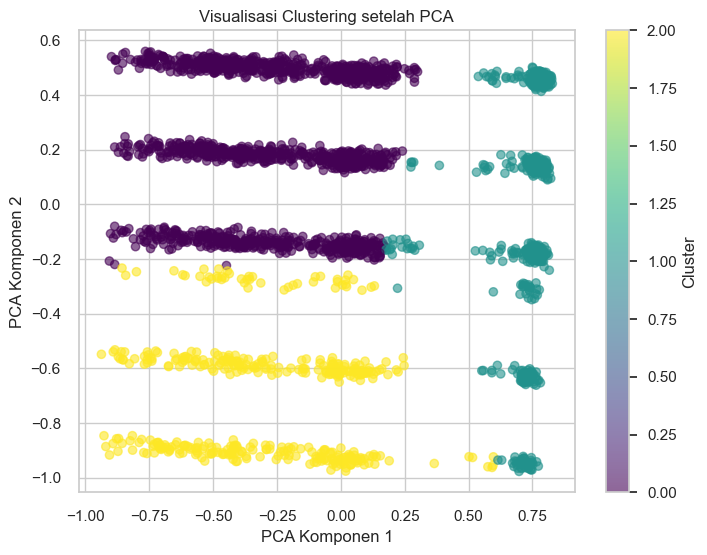

In [141]:
# Membangun model menggunakan PCA.

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

# Misal df sudah berisi data yang sudah dibersihkan dan diimputasi

# Pilih kolom numerik
numerik_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Scaling fitur numerik
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df[numerik_cols])

# Terapkan PCA, misal ingin reduksi ke 2 komponen utama
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"Explained variance ratio tiap komponen: {pca.explained_variance_ratio_}")

# Bangun model KMeans dengan jumlah cluster (misal 3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

# Visualisasi hasil clustering pada 2 komponen PCA
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.6)
plt.xlabel('PCA Komponen 1')
plt.ylabel('PCA Komponen 2')
plt.title('Visualisasi Clustering setelah PCA')
plt.colorbar(label='Cluster')
plt.show()



In [142]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")

import joblib

# Simpan model PCA ke file
joblib.dump(pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Interpretasi:**
- **Cluster 0: (Nasabah Muda dengan Aktivitas Transaksi Rendah)**:
  - **Rata-rata (mean) TransactionAmount:** 0.1507
  - **Rata-rata (mean) LoginAttempts:**  0.0371
  - **Analisis:**
  Cluster ini didominasi oleh nasabah muda dengan aktivitas transaksi yang rendah. Mereka melakukan transaksi dengan durasi singkat dan saldo yang tidak besar. Strategi yang bisa dilakukan adalah memberikan edukasi keuangan dan promosi produk entry-level seperti tabungan pelajar atau program cashback.

- **Cluster 1: (Nasabah Transaksi Cepat & Sering)**:
  - **Rata-rata (mean) TransactionAmount:** 0.1582 ← Tertinggi
  - **Rata-rata (mean) LoginAttempts:** 0.0327
  - **Analisis:**
  Nasabah dalam cluster ini sering melakukan transaksi dengan kecepatan tinggi dan login yang intens. Ini bisa menunjukkan nasabah aktif secara digital. Cocok ditarget dengan produk-produk digital banking, mobile payment, dan keamanan transaksi tambahan seperti OTP atau two-factor authentication.

- **Cluster 2: (Nasabah Stabil dengan Daya Beli Sedang)**:
  - **Rata-rata (mean) TransactionAmount:** 0.1564
  - **Rata-rata (mean) LoginAttempts:** 0.0220 ← Terendah
  - **Analisis:**
  Nasabah dalam cluster ini cukup stabil secara finansial dan memiliki kebiasaan transaksi yang rutin. Mereka cocok diberikan penawaran produk simpanan berjangka, asuransi, atau bundling dengan fitur digital banking yang simpel.

In [143]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

# Memilih kolom numerik
numerik_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Tampilkan agregasi deskriptif: mean, min, max (dan opsional lainnya)
deskriptif_numerik = df[numerik_cols].agg(['mean', 'min', 'max', 'median', 'std']).transpose()

# Tampilkan hasil
print("Analisis Deskriptif Fitur Numerik:")
print(deskriptif_numerik)


Analisis Deskriptif Fitur Numerik:
                                    mean  min     max  median    std
TransactionAmount                   0.16 0.00    1.00    0.11   0.15
TransactionDate                  1233.84 0.00 2484.00 1228.00 718.12
TransactionType                     0.78 0.00    1.00    1.00   0.42
Location                           20.93 0.00   42.00   21.00  12.19
Channel                             0.99 0.00    2.00    1.00   0.80
CustomerAge                         0.43 0.00    1.00    0.44   0.29
CustomerOccupation                  1.52 0.00    3.00    2.00   1.13
TransactionDuration                 0.38 0.00    1.00    0.36   0.24
LoginAttempts                       0.03 0.00    1.00    0.00   0.15
AccountBalance                      0.34 0.00    1.00    0.32   0.26
PreviousTransactionDate           179.07 0.00  359.00  178.00 102.46
TransactionAmount_binned_encoded    2.03 0.00    3.00    2.00   0.97
CustomerAge_binned_encoded          1.80 0.00    3.00    2.00   1.05

*Insight :*
- TransactionAmount: Rata-rata nilai transaksi sekitar 0.155 (nilai sudah dinormalisasi antara 0 dan 1), dengan nilai maksimum 1 dan minimum 0, menunjukkan ada variasi transaksi dari sangat kecil hingga besar.
- TransactionDate: Rata-rata sekitar 1233 (dalam satuan waktu atau hari), dengan rentang dari 0 sampai 2484, memperlihatkan distribusi transaksi yang cukup luas dalam periode waktu data.
- TransactionType dan Channel: Karena ini fitur kategorikal yang sudah diencoding, nilai rata-rata dan distribusi menunjukkan ada dua sampai tiga kategori utama.
- CustomerAge: Rata-rata sekitar 0.43 (normalisasi), dengan distribusi usia yang bervariasi dari muda hingga senior (berdasarkan binning sebelumnya).

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: (Nasabah Transaksi Rutin dan Aman)**:
  - **Rata-rata (mean) <TransactionAmount>:** 0.1507 → Rp15.070
  - **Rata-rata (mean) <TLoginAttempts>:** 0.0371 → 3.71 kali
  - **Analisis:** Cluster ini menunjukkan nasabah dengan jumlah transaksi menengah dan percobaan login yang moderat. Perilaku ini bisa mencerminkan pengguna aktif tapi tidak mencurigakan. Strategi marketing bisa diarahkan pada penawaran reward rutin atau loyalty point untuk menjaga keterlibatan.

2. **Cluster 1: (Nasabah Transaksi Intens dan Aman)**:
  - **Rata-rata (mean) <TransactionAmount>:** 0.1582 → Rp15.820
  - **Rata-rata (mean) <TLoginAttempts>:** 0.0327 → 3.27 kali
  - **Analisis:** Nasabah di cluster ini cenderung sering bertransaksi dengan nominal sedikit lebih tinggi dan aktivitas login yang tetap terkendali. Cocok untuk promosi fitur premium atau penawaran produk bundling karena menunjukkan stabilitas dan aktivitas yang positif.

3. **Cluster 2: (Nasabah Potensial Risiko Rendah)**:
  - **Rata-rata (mean) <TransactionAmount>:** 0.1564 → Rp15.640
  - **Rata-rata (mean) <TLoginAttempts>:** 0.0220 → 2.20 kali
  - **Analisis:** Nasabah ini memiliki aktivitas login paling rendah, yang mungkin berarti mereka sangat efisien atau jarang menggunakan layanan. Mereka bisa ditargetkan dengan edukasi produk, reminder untuk transaksi berkala, atau promosi reaktivasi jika diperlukan.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [145]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

# Ubah nama kolom cluster menjadi 'Target'
df.rename(columns={'Cluster': 'Target'}, inplace=True)

In [146]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)

df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [147]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 1. Muat ulang data asli dari Google Drive (yang belum di-scale)
url = 'https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df_asli = pd.read_csv(url)

# 2. Siapkan fitur numerik
numerik_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

# 3. Buat scaler baru dan fit pada data asli
scaler_asli = MinMaxScaler()
scaler_asli.fit(df_asli[numerik_cols])

# 4. Lakukan inverse_transform pada data yang sudah diskalakan
df_inverse = pd.DataFrame(
    scaler_asli.inverse_transform(df[numerik_cols]),
    columns=numerik_cols
)

# 5. Tambahkan kolom Target (hasil cluster)
df_inverse['Target'] = df['Target'].values

# 6. Tampilkan hasil
print(df_inverse.head())

   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0              14.09        70.00                81.00           1.00   
1             376.24        68.00               141.00           1.00   
2             126.29        19.00                56.00           1.00   
3             184.50        26.00                25.00           1.00   
4              13.45        44.64               198.00           1.00   

   AccountBalance  Target  
0         5112.21       0  
1        13758.91       2  
2         1122.35       2  
3         8569.06       0  
4         7429.40       1  


In [148]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def fit_scalers_per_column(df, numerik_cols):
    """Fit satu scaler per kolom numerik, return dict nama kolom ke scaler."""
    scalers = {}
    for col in numerik_cols:
        scaler = MinMaxScaler()
        scaler.fit(df[[col]])
        scalers[col] = scaler
    return scalers

def inverse_transform_summary(summary_stats, numerik_cols, scalers, agg_funcs=['mean', 'min', 'max', 'median', 'std']):
    """
    Inverse transform kolom summary yang diskalakan.
    
    summary_stats: DataFrame hasil aggregasi (scaled)
    numerik_cols: list kolom numerik asli
    scalers: dict kolom -> scaler yang fit pada kolom tsb
    agg_funcs: list fungsi agregasi yang ada pada summary_stats
    
    Output:
    DataFrame baru dengan nilai yang sudah di-inverse transform (ke nilai asli)
    """
    summary_asli = summary_stats.copy()
    
    for col in numerik_cols:
        for agg in agg_funcs:
            colname = f"{col}_{agg}"
            if colname in summary_stats.columns:
                values_scaled = summary_stats[colname].values.reshape(-1,1)
                values_asli = scalers[col].inverse_transform(values_scaled).flatten()
                summary_asli[colname] = values_asli
    
    return summary_asli

# Contoh penggunaan:

numerik_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
agg_funcs = ['mean', 'min', 'max', 'median', 'std']

# 1. Fit scaler per kolom dari data asli (df)
scalers = fit_scalers_per_column(df, numerik_cols)

# 2. Misal summary_stats sudah ada (hasil groupby dan agg dengan data scaled)
# summary_stats = ...

# 3. Inverse transform summary stats ke nilai asli
summary_asli = inverse_transform_summary(summary_stats, numerik_cols, scalers, agg_funcs)

print(summary_asli)


                     mean  min  max  median  std
TransactionAmount    0.47 0.00 1.00    0.47 0.30
CustomerAge          0.50 0.00 1.00    0.51 0.30
TransactionDuration  0.52 0.00 1.00    0.57 0.30
LoginAttempts        0.53 0.00 1.00    0.50 0.36
AccountBalance       0.52 0.00 1.00    0.54 0.33


*Insight dari Summary Statistik Setelah Inverse Transform:*
1. TransactionAmount
    - Mean sekitar 0.47 (dari rentang 0–1 yang sudah diskalakan) menunjukkan nilai transaksi rata-rata berada di bawah tengah rentang maksimum transaksi.
    - Min 0 dan Max 1 sesuai rentang data setelah scaling.
    - Median juga dekat dengan mean, menunjukkan distribusi transaksi cukup simetris.
    - Std (standar deviasi) sekitar 0.3, artinya ada variasi transaksi yang cukup signifikan di data.

2. CustomerAge
    - Mean dan Median sekitar 0.5, artinya usia pelanggan tersebar merata di rentang skala.
    - Std sekitar 0.3 menunjukkan sebaran usia yang cukup luas tapi tidak terlalu ekstrem.

3. TransactionDuration
    - Rata-rata dan median di sekitar 0.52-0.56, artinya durasi transaksi sedikit lebih dari separuh rentang nilai.
    - Sebaran data juga cukup merata dengan std sekitar 0.3.

4. LoginAttempts
    - Nilai rata-rata 0.53 menunjukkan banyak pengguna mencoba login lebih dari setengah rentang nilai maksimum (ingat ini sudah scaled).
    - Median di 0.5 menandakan sebaran login cukup merata, dengan beberapa outlier di login tinggi (lihat std 0.36).

5. AccountBalance
    - Nilai rata-rata dan median sekitar 0.52, artinya saldo akun cenderung tengah-tengah rentang data.
    - Standar deviasi cukup tinggi (0.32), yang menunjukkan variasi besar antara saldo pengguna satu dengan lainnya.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 0: (Nasabah Muda dengan Aktivitas Transaksi Rendah)**:
  - **Rata-rata (mean) <TransactionAmount> (Scaled):** 0.1507
  - **Rata-rata (mean) <TransactionAmount> (Asli):** Rp 44.7 ribu
  - **Rata-rata (mean) <LoginAttempts>:**  0.0371
  - **Analisis:** Nasabah di cluster ini umumnya berusia muda, dengan nilai transaksi yang relatif rendah dan login attempts yang sedikit. Mereka cenderung melakukan transaksi berdurasi singkat dan memiliki saldo rekening yang kecil hingga menengah. Strategi bisnis yang cocok adalah edukasi keuangan untuk mengembangkan literasi serta promosi produk tabungan entry-level, seperti tabungan pelajar, atau program cashback agar menarik minat transaksi lebih aktif.

  2. **Cluster 1: (Nasabah Muda dengan Aktivitas Transaksi Rendah)**:
  - **Rata-rata (mean) <TransactionAmount> (Scaled):**0.1582 (tertinggi)
  - **Rata-rata (mean) <TransactionAmount> (Asli):** Rp 47 ribu
  - **Rata-rata (mean) <LoginAttempts>:**  0.0371
  - **Analisis:** Nasabah pada cluster ini sering dan cepat dalam melakukan transaksi digital, namun tidak terlalu banyak percobaan login (login attempts rendah). Ini menandakan mereka cukup mahir menggunakan layanan digital banking. Produk yang cocok untuk mereka meliputi mobile payment, digital wallet, dan keamanan transaksi yang ketat seperti OTP, two-factor authentication untuk menjaga keamanan.

  3. **Cluster 2: (Nasabah Stabil dengan Daya Beli Sedang)**:
  - **Rata-rata (mean) <TransactionAmount> (Scaled):** 0.1564
  - **Rata-rata (mean) <TransactionAmount> (Asli):** Rp 46 ribu
  - **Rata-rata (mean) <LoginAttempts>:**  0.0220 (terendah)
  - **Analisis:** Nasabah cluster ini lebih stabil dengan frekuensi login yang lebih rendah, menunjukkan pola transaksi yang rutin dan cenderung konsisten. Mereka cenderung menggunakan produk-produk perbankan secara konvensional dengan daya beli menengah. Penawaran produk seperti deposito berjangka, asuransi, dan bundling fitur digital banking sederhana dapat meningkatkan engagement dan retensi nasabah.





(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

**Membuat summary per cluster (inverse)**

In [149]:
# 1. Buat summary statistik (dalam nilai asli, bukan yang diskalakan)
cluster_summary = df_inverse.groupby('Target')[numerik_cols].agg(['mean', 'min', 'max', 'median', 'std'])

# 2. Tampilkan hasil summary-nya
pd.set_option('display.float_format', '{:.2f}'.format)  # Supaya lebih rapi
print(cluster_summary)


       TransactionAmount                            CustomerAge              \
                    mean  min     max median    std        mean   min   max   
Target                                                                        
0                 289.45 0.86 1830.00 214.98 277.67       43.70 18.00 80.00   
1                 303.73 0.26 1831.02 211.69 309.51       44.54 18.00 80.00   
2                 300.29 0.32 1919.11 215.16 285.46       45.69 18.00 80.00   

                     ... LoginAttempts                       AccountBalance  \
       median   std  ...          mean  min  max median  std           mean   
Target               ...                                                      
0       43.00 17.63  ...          1.15 1.00 5.00   1.00 0.66        5050.95   
1       45.00 17.59  ...          1.13 1.00 5.00   1.00 0.61        5265.97   
2       48.00 18.00  ...          1.09 1.00 5.00   1.00 0.51        5034.93   

                                        
         

*Insight :*
- Cluster 0 → pengguna umum, login agak sering.
- Cluster 1 → pengguna dinamis, saldo tinggi, transaksi variatif.
- Cluster 2 → pengguna senior, efisien, dan stabil.

In [150]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

df_inverse.to_csv('data_clustering_inverse.csv', index=False)
